In [5]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph

In [6]:
from micrograd.engine import Value

In [7]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

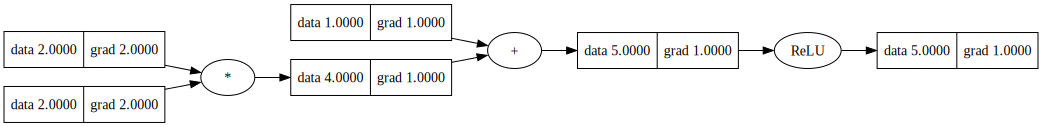

In [9]:
# a very simple example
x = Value(2.0)
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

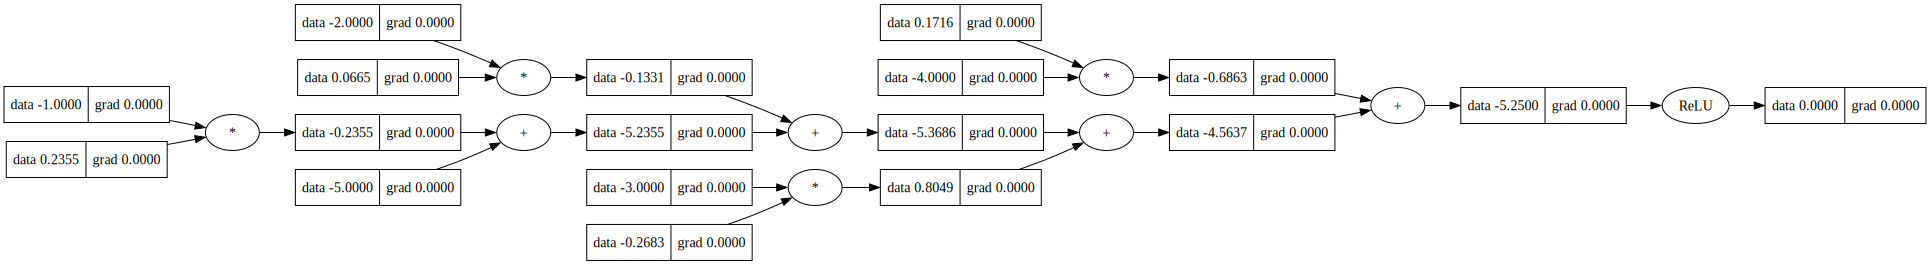

In [22]:
# a simple 2D neuron
import random
from micrograd import nn

random.seed(1337)
n = nn.Neuron(4)
n.b.data = -5.0
x = [Value(-1.0), Value(-2.0),Value(-3.0), Value(-4.0)]
y = n(x)
#y.backward()

dot = draw_dot(y)
dot

In [20]:
n.parameters()

[Value(data=0.23550571390294128, grad=0.0, op=, prev=0),
 Value(data=0.06653114721000164, grad=0.0, op=, prev=0),
 Value(data=-4.0, grad=0, op=, prev=0)]

In [11]:
dot.render('gout')

'gout.svg'

In [ ]:
random.seed(1337)
n = nn.MLP(4[2,1])
#n.b.data = -5.0
x = [Value(-1.0), Value(-2.0),Value(-3.0), Value(-4.0)]
y = n(x)
#y.backward()

dot = draw_dot(y)
dot

TypeError: unhashable type: 'list'

In [27]:
n.parameters()

[Value(data=0.23550571390294128, grad=0, op=, prev=0),
 Value(data=0.06653114721000164, grad=0, op=, prev=0),
 Value(data=-0.26830328150124894, grad=0, op=, prev=0),
 Value(data=0.1715747078045431, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0),
 Value(data=-0.6686254326224383, grad=0, op=, prev=0),
 Value(data=0.6487474938152629, grad=0, op=, prev=0),
 Value(data=-0.23259038277158273, grad=0, op=, prev=0),
 Value(data=0.5792256498313748, grad=0, op=, prev=0),
 Value(data=0, grad=0, op=, prev=0)]